# (2017-fordgobike-tripdata)
## by (Wessam Hamdy)

## Investigation Overview

> In this investigation of the Ford GoBike dataset, I wanted to find the most and the least time of rides happen and  look at the most common user type and it's behaviors

## Dataset Overview

> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area,includes 519,700 trips with 13 features such as stations, locations, time, and user attributes

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_new = pd.read_csv('2017-fordgobike-tripdata-cleaned.csv')
df_new.head()

,start_station_name,end_station_name,bike_id,user_type,start_date,end_date,start_hour,end_hour,start_day_week,end_day_week,start_day_month,end_day_month,start_month,end_month,duration_min
0,Laguna St at Hayes St,San Francisco Public Library (Grove St at Hyde...,96,Customer,2017-12-31,2018-01-01,16,15,Sunday,Monday,31,1,December,January,1335
1,Yerba Buena Center for the Arts (Howard St at ...,Dolores St at 15th St,88,Customer,2017-12-31,2018-01-01,15,13,Sunday,Monday,31,1,December,January,1313
2,Downtown Berkeley BART,Downtown Berkeley BART,1094,Customer,2017-12-31,2018-01-01,22,11,Sunday,Monday,31,1,December,January,763
3,8th St at Ringold St,Powell St BART Station (Market St at 5th St),2831,Customer,2017-12-31,2018-01-01,17,10,Sunday,Monday,31,1,December,January,1036
4,Bancroft Way at Telegraph Ave,Fulton St at Bancroft Way,3167,Subscriber,2017-12-31,2018-01-01,14,2,Sunday,Monday,31,1,December,January,727


## What is the duration of most rides?

> We note that most trips are approximately 10 minutes

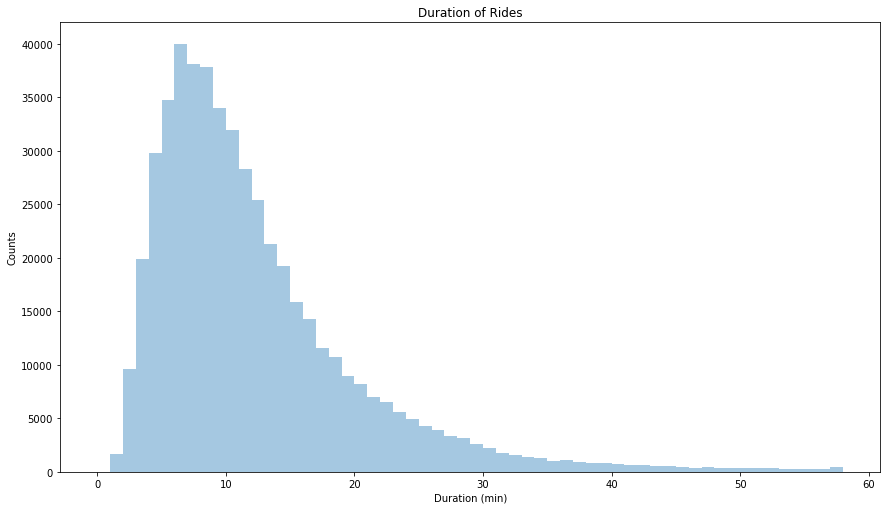

In [3]:
#customize the number of the bins
bins = np.arange(0, df_new.duration_min.std()+1,1)
#size of the chart
plt.figure(figsize=[14.70, 8.27]); 
#plot the histogram
sns.distplot(df_new.duration_min, bins=bins, kde=False);
#plot label
plt.title('Duration of Rides');
#y label
plt.ylabel('Counts');
#x label
plt.xlabel('Duration (min)');

## The most 10 popular start and end stations.

> San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St are the most common start station

> San Francisco Caltrain (Townsend St at 4th St) and San Francisco Ferry Building (Harry Bridges Plaza) are the most common end station

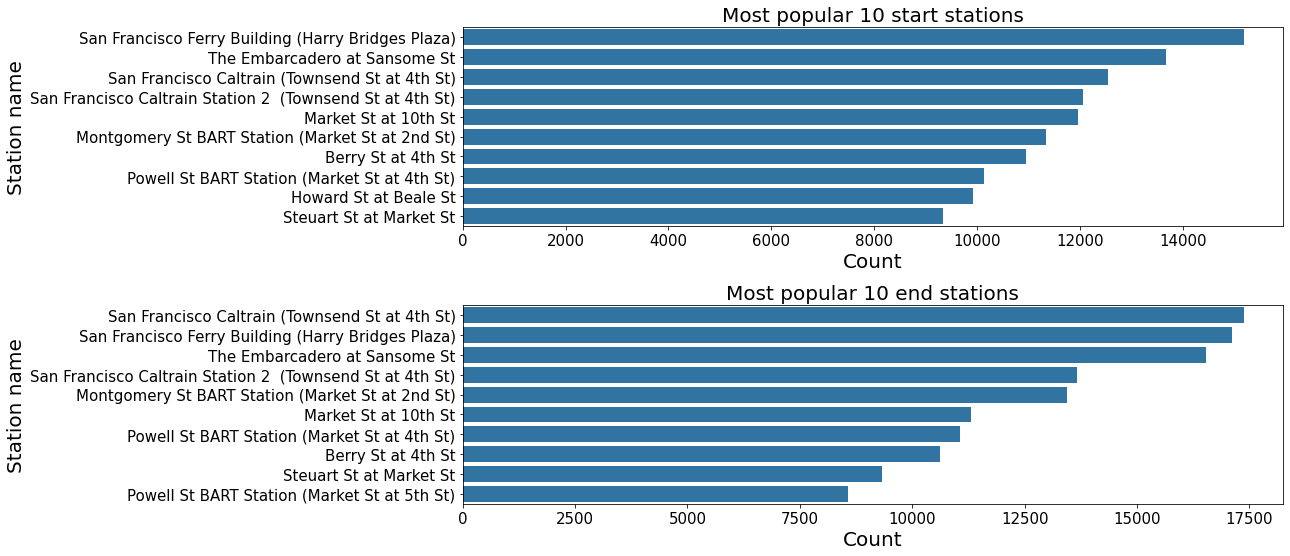

In [4]:
#we will split it into 2 parts start and end graph
#Set a larger figure size for subplots
plt.figure(figsize=[14.70, 8.27]);
# 2 rows, 1 col, subplot 1
plt.subplot(2, 1, 1) 
sns.countplot(data=df_new, y='start_station_name',color=sns.color_palette()[0],order=df_new.start_station_name.value_counts().iloc[:10].index);
#x axis label
plt.xlabel("Count",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Station name",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular 10 start stations",size = 20)   

# 2 row, 1 col, subplot 2
plt.subplot(2, 1, 2) 
sns.countplot(data=df_new, y='end_station_name',color=sns.color_palette()[0],order=df_new.end_station_name.value_counts().iloc[:10].index);
#x axis label
plt.xlabel("Count",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Station name",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular 10 end stations",size = 20);
plt.subplots_adjust(bottom=0.1,
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## The most common user type.

> 21.3% of the riders are Custmoers while 78.7% are Subscriber, so most of users are subscribers

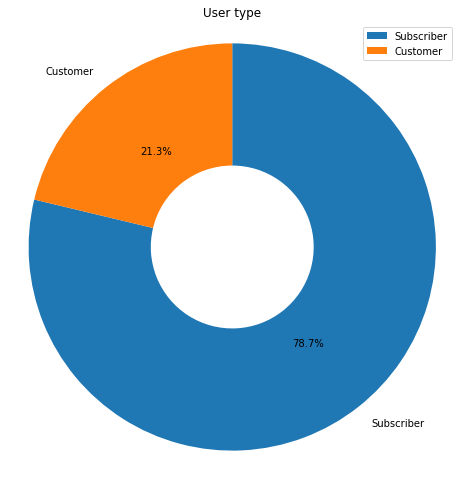

In [5]:
#size of the chart
plt.figure(figsize=[14.70, 8.27]);
plt.pie(df_new['user_type'].value_counts(), labels=df_new['user_type'].value_counts().index, startangle = 90, wedgeprops = {'width' : 0.6}, counterclock = False, autopct='%.1f%%');
plt.axis('square');
plt.title("User type");
plt.legend()

## What are the most common days?

> Most of users prefer weekdays than weekends so Tuesday and Wednesday are the most common days, while Sunday is the least day

> Day 6 and 7 are the most common too, while 31 and 23 are the least

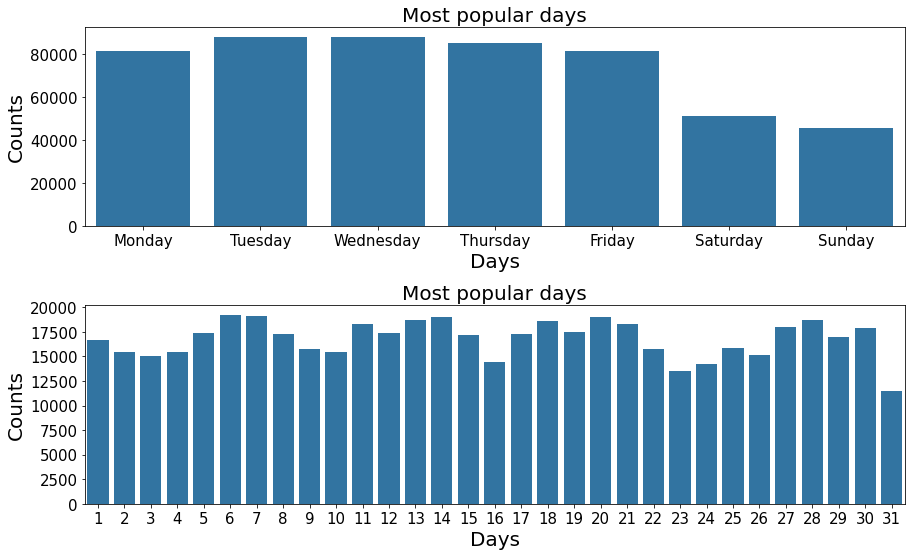

In [6]:
#change the days into ordered values to sort it
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_category = pd.api.types.CategoricalDtype(ordered=True, categories=week_days)
#apply it on start day
df_new['start_day_week'] = df_new['start_day_week'].astype(week_category)

#size of the chart
plt.figure(figsize=[14.70, 8.27]);
plt.subplot(2,1,1)
#plot a bar chart
sns.countplot(data=df_new, x='start_day_week',color=sns.color_palette()[0]);
#x axis label
plt.xlabel("Days",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Counts",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular days",size = 20);

plt.subplot(2,1,2)
#plot a bar chart
sns.countplot(data=df_new, x='start_day_month',color=sns.color_palette()[0]);
#x axis label
plt.xlabel("Days",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Counts",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular days",size = 20);
plt.subplots_adjust(bottom=0.1,
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## What is the most common month?

> they do few trips in June, and almost of their trips are in September, October, November

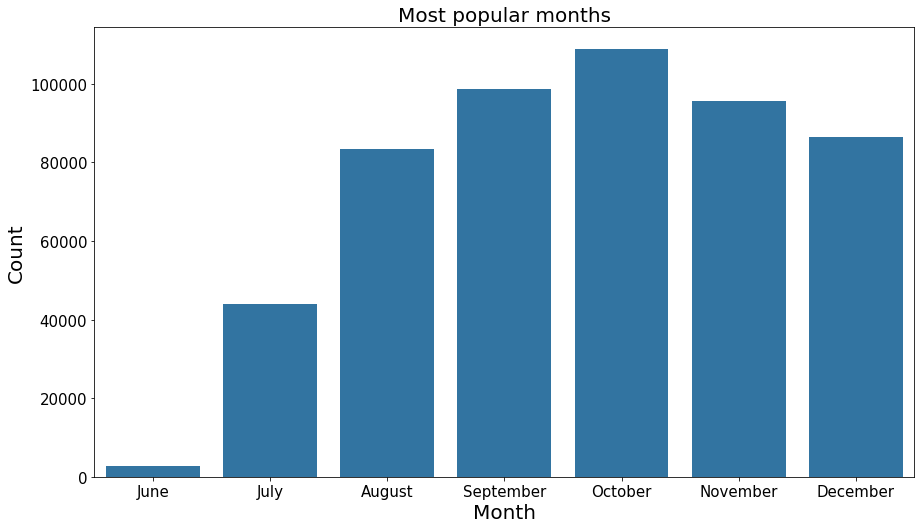

In [7]:
#make ordered months to sort it
months = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
month_category = pd.api.types.CategoricalDtype(ordered=True, categories=months)
#apply it on start month
df_new['start_month'] = df_new['start_month'].astype(month_category)
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#bar chart
sns.countplot(data=df_new, x='start_month',color=sns.color_palette()[0]);
#x axis label
plt.xlabel("Month",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular months",size = 20);

## What is the frequency of users type per hour?

> from 12 am to 6 am there is the least time, and It's obvious because they are sleeping

> the most frequency of Subscribers is 8-9 AM and 5-6 PM, the two intervals almost equal, i think because these are working hours, while Customers prefer doing trips from 8 AM to 6 PM

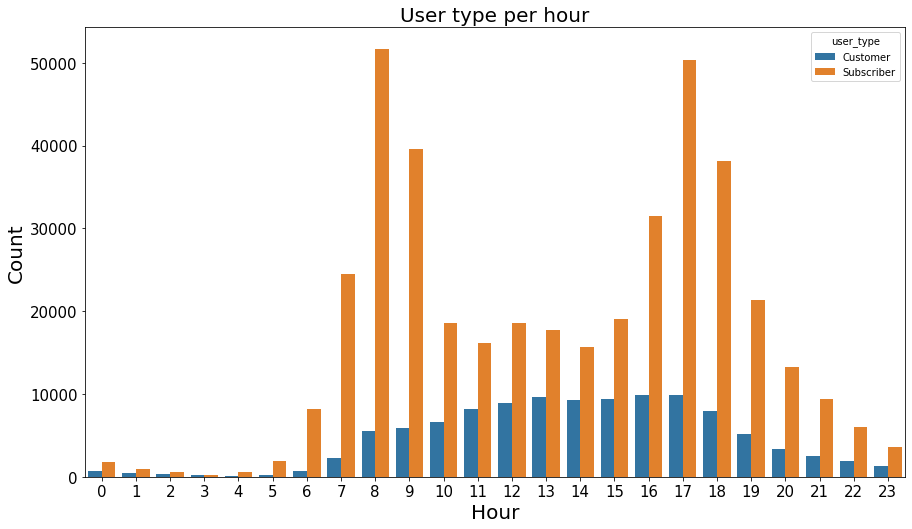

In [8]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#bar chart
sns.countplot(data=df_new, x='start_hour',hue='user_type');
#x axis label
plt.xlabel("Hour",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("User type per hour",size = 20);

## What is the frequency of users type per day?

> the frequency of the Customer type on weekdays is almost equal, but they prefer doing trips on weekends

> the frequency of the Subscriber type on weekdays is almost equal too and their trips almost in weekdays

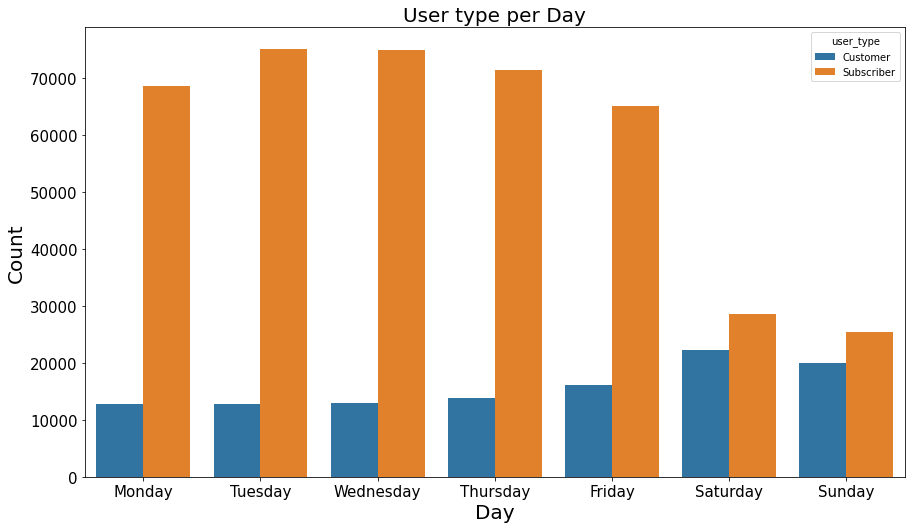

In [9]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#bar chart
sns.countplot(data=df_new, x='start_day_week',hue='user_type');
#x axis label
plt.xlabel("Day",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("User type per Day",size = 20);

## What is the most day during each month that most trips take place?

>the most common days in June are Thursday and Friday, they almost equal, and we can notice they did not ride in the other days
they just ride in these three days

>the most common days in July is Monday

>the most common days in August are Tuesday, Wednesday and Thursday they are almost equal

>the most common day in September is Friday

>the most common days in October are Monday and Tuesday they are almost equal

>the most common days in November is Wednesday

>the most common days in December is Friday

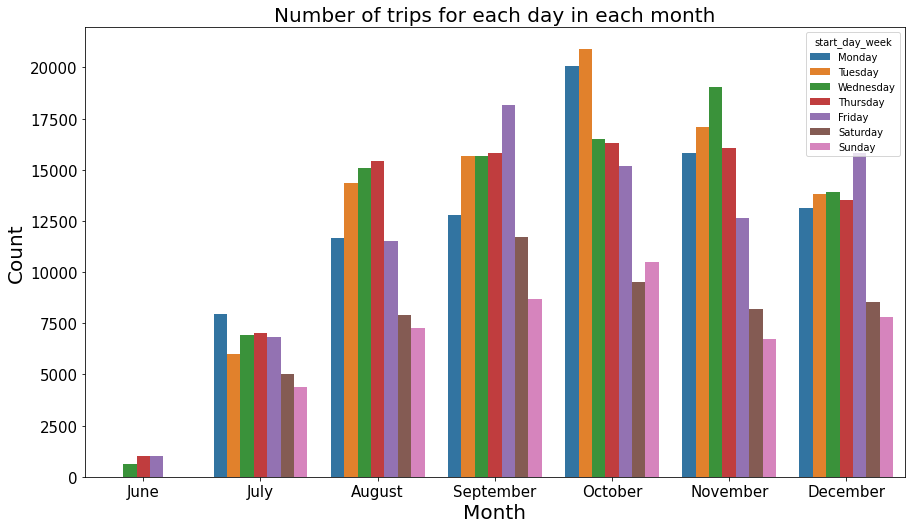

In [10]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#bar chart
sns.countplot(data=df_new, x='start_month',hue='start_day_week');
#x axis label
plt.xlabel("Month",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("Number of trips for each day in each month",size = 20);

## What is the most common hours for each user in each day?

> Customers prefer weekends afternoon hours, while Subscribers prefer weekdays specialy 8 AM and 5 PM

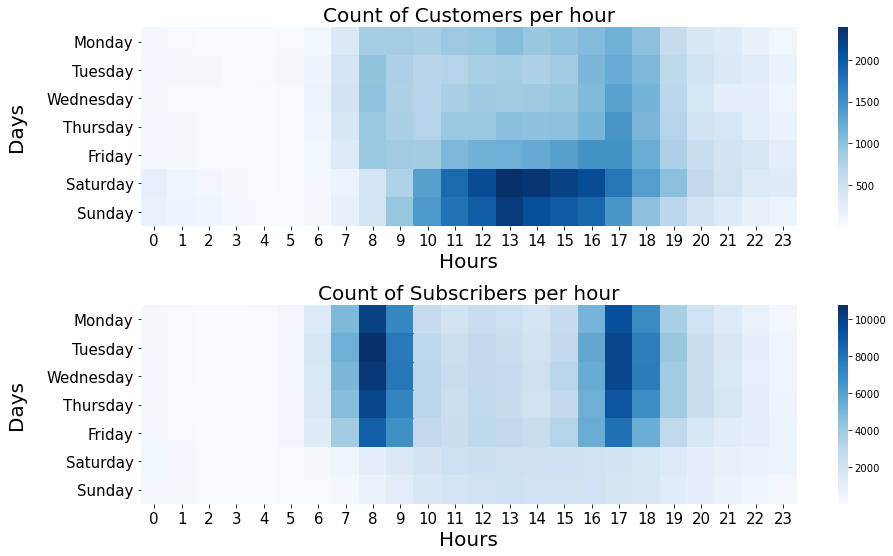

In [11]:
#pick only Customers type from the data
Customers = df_new.query('user_type=="Customer"')
#group the data by start day and start hour
Customers = Customers.groupby(['start_day_week','start_hour']).size()
Customers = Customers.reset_index(name='Count of Customers')
#create a pivot table
Customers = Customers.pivot(index='start_day_week',columns='start_hour',values='Count of Customers')
#size of the plot
plt.figure(figsize=[14.70, 8.27]);
plt.subplot(2,1,1)
#create a heatmap
sns.heatmap(Customers, cmap='Blues')
#x axis label
plt.xlabel("Hours",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Days",size=20,labelpad=20)
plt.yticks(size=15,rotation=0)
#plot label
plt.title("Count of Customers per hour",size = 20);

#pick only Subscriber type from the data
Subscribers = df_new.query('user_type=="Subscriber"')
#group the data by start day and start hour
Subscribers = Subscribers.groupby(['start_day_week','start_hour']).size()
Subscribers = Subscribers.reset_index(name='Count of Subscribers')
#create a pivot table
Subscribers = Subscribers.pivot(index='start_day_week',columns='start_hour',values='Count of Subscribers')
#create a second heatmap
plt.subplot(2,1,2)
sns.heatmap(Subscribers,cmap='Blues')
#x axis label
plt.xlabel("Hours",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Days",size=20,labelpad=20)
plt.yticks(size=15,rotation=0)
#plot label
plt.title("Count of Subscribers per hour",size = 20);

plt.subplots_adjust(bottom=0.1,
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [12]:
!jupyter nbconvert Explanatory.ipynb --no-input --to slides --post serve --SlidesExporter.reveal_theme=serif --SlidesExporter.reveal_scroll=True  

^C
